## Import necessary python modules

In [1]:
from streakimage import StreakImage

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importing Jupyter notebook from heatmap.ipynb


## Import Data

### Load background

In [2]:
path_to_bg = "files/example_bg ST4 g20 20x556ms.img"
bg = StreakImage(path_to_bg)

### Load image

In [3]:
path_to_img = "files/example_streak-image ST4 g20 20x556ms.img"
image =  StreakImage(path_to_img, bg=bg)

### Plot raw data

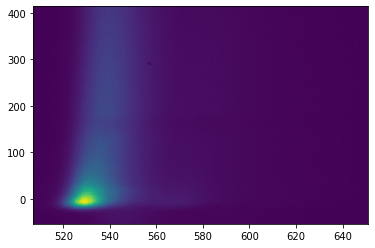

In [25]:
plt.pcolormesh(image.data.columns, image.data.index, image.data, shading='nearest')

The image data is stored in a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Subsets of the data frame can be selected with the [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) functions.
While loc takes labels as indices as arguments, iloc takes absolut column position. The linked documentations list the different types of 
For a 512x640 pixel image this means iloc takes the (WIP)

## Correct image stepwise

calculate offset from 'dark' area in image

In [ ]:
wl_from = 
wl_to = 
time_from = 
time_to = 

offset = 